# **Week 14: Basics of Machine learning: Uing decision tree and random forest for Iris classification and ENSO prediction**

This jupyter notebook aims to explain the basic concept of machine learning, especially for decision tree and random forest. 
Basic concepts include:
1. data wrangling (part 1)
2. sklearn framework (part 1)
3. overfitting/underfitting, regularization (part 1)
4. decision tree; random forest (part 2)
5. classification/confusion matrix (part 2)

# **Reference:**
### [1] Climate Change AI Summer School: Day 3 Climate Science Tutorial: Seasonal Forecasting by Ankur Mahesh (UC Berkeley)
See [here](https://colab.research.google.com/drive/1eLEYFK3Mrae_nu1SzAjg7Sdf40bWnKTg#scrollTo=12Pzw4pM1Fhs&forceEdit=true&sandboxMode=true) for the original notebook for CCAI tutorial.

This material is modified by Dr.Yi-Chi Wang and used for NTU IPCS class only.

### introduction of decision tree and random forest (Kaggle learn)

As an nonlinear model we first introduce, the model of **decision tree** is actually commonly used for decision making, in which the decision process is represented as a tree-like structure.


The depth of the tree, which represents number of decision levels, is a key parameter for decision tree model.
Usually, a deep tree with lots of leaves can be overfit because each prediction is coming from historical data from only a few samples at its leaf. 
But a shallow tree with few leaves usually performs poorly because it fails to capture as many distinctions in the raw data.

To resolve the tension between underfitting and overfittig of decision tree, we can use an ensemble techinique to help. 
That is, we can use the **random forest** model, which uses many trees and makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

### Classification example of random forest with iris flower data

Here, we will use one of the most famous dataset for pattern recognition, iris flower dataset, as our example of random forest.
The description of **iris flower dataset** can be found in https://en.wikipedia.org/wiki/Iris_flower_data_set.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-1-164f59effc58>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# https://en.wikipedia.org/wiki/Iris_flower_data_set
from sklearn.datasets import load_iris
data = load_iris()
#print(data)

In-class exercise I: Please write python code to print out the file information of the iris data. Answer the questions below.

* From the description, what data is saved in this dataset?
* How many records does the data have?
* What's the data with the tag "target"?
* What's the data with the tag "features"?
* How many features/labels does the data have?

In [3]:
# answers



In [4]:
# read the feature data into pandas dataframe with 'feature_names' as columns
import pandas as pd

X = pd.DataFrame(data['data'],columns=data['feature_names'])
X.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [5]:
print(X.shape)

(150, 4)


In [6]:
# # read the target data into pandas dataframe with 'target_names' as columns
y = pd.DataFrame(data['target'],columns=['target_names'])

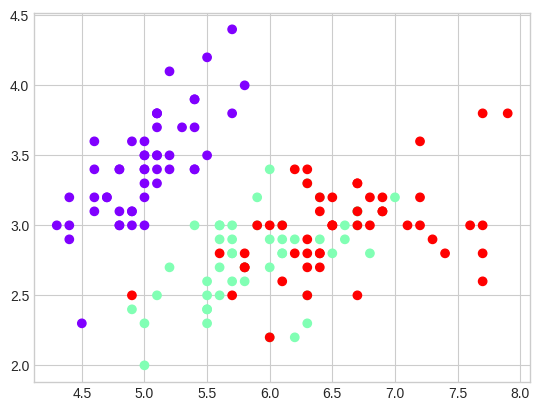

In [7]:
#from sklearn.datasets import make_blobs

#X, y = make_blobs(n_samples=300, centers=4,
#                  random_state=0, cluster_std=1.0)
Xdata=X.values
ydata=y.values

fig, ax = plt.subplots()
ax.scatter(Xdata[:, 0], Xdata[:, 1],c=ydata,cmap='rainbow')
ax.legend()

In [28]:
# split the data into training and test data
from sklearn.model_selection import train_test_split
[X_train,X_test,y_train,y_test]=train_test_split(X,y)

# Use decision tree model
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
y_dtpred = decisiontree.predict(X_test)

## Visualize decision tree

In [29]:
from sklearn.tree import export_graphviz

estimator = decisiontree
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = data.feature_names,
                class_names = data.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

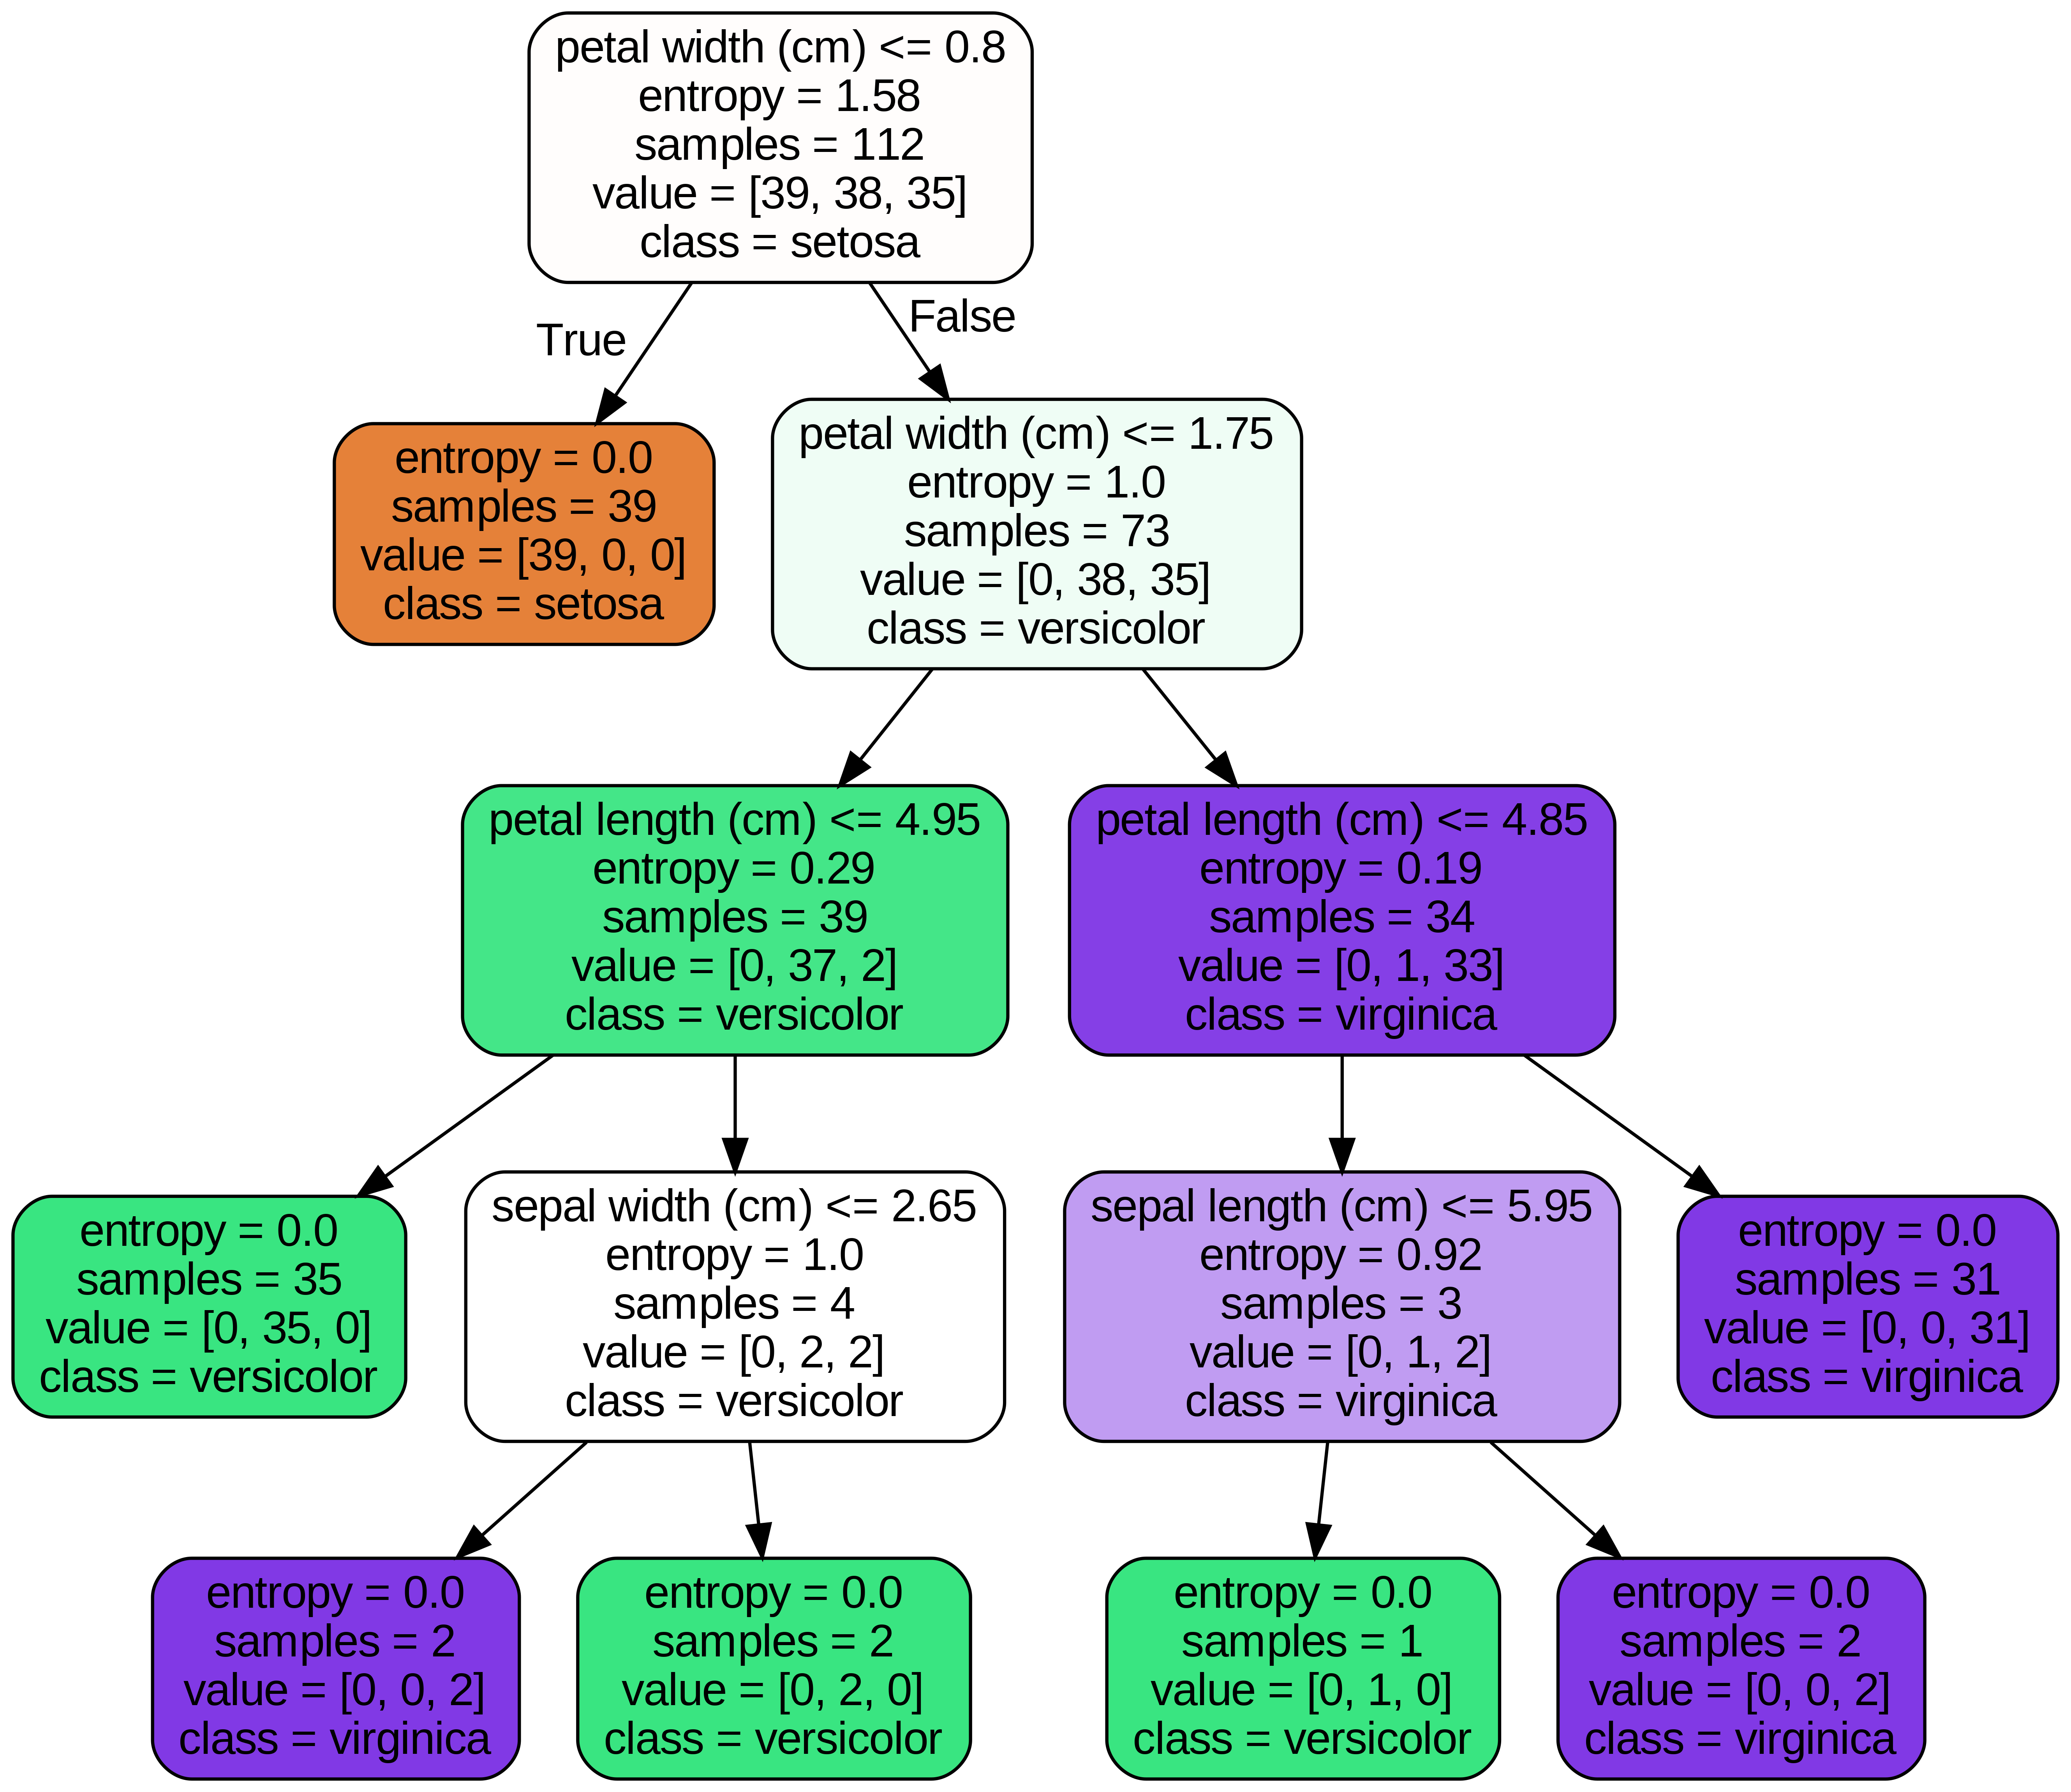

In [30]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

For classification problem, we usually use the confusion matrix to evaluate model performance.


In [31]:
# calculate confusion matrix to evaluate the model performance
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, r2_score
print(f"F1 Score: {round(f1_score(y_test, y_dtpred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_dtpred), 2)}")

F1 Score: 0.93
Accuracy: 0.92


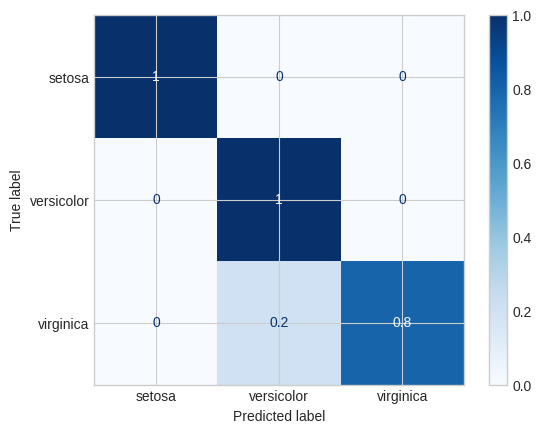

In [32]:
# plot confusion matrix with normalization
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        decisiontree,
        X_test,
        y_test,
        display_labels=data.target_names,
        cmap=plt.cm.Blues,
        normalize="true",
    )

## Random Forest model
We then use the random forest model to do the prediction for iris classification.

In [35]:
# Use random forest model
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators=10,criterion="entropy").fit(X_train, y_train)
y_rfpred = rfclassifier.predict(X_test)

<ipython-input-35-4182ec9db46d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclassifier = RandomForestClassifier(n_estimators=10,criterion="entropy").fit(X_train, y_train)


In [36]:
# calculate the confusion matrix
#from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, r2_score
print(f"F1 Score: {round(f1_score(y_test, y_rfpred, average='macro'), 2)}")
print(f"Accuracy: {round(accuracy_score(y_test, y_rfpred), 2)}")

F1 Score: 0.93
Accuracy: 0.92


### Visualize a tree model in random forest:
As the random forest uses multiple trees for decision making, we can plot one of the trees used in random forest by specifying tree number. 

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_iris.html

In [37]:
from sklearn.tree import export_graphviz

estimator = rfclassifier.estimators_[5]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = data.feature_names,
                class_names = data.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

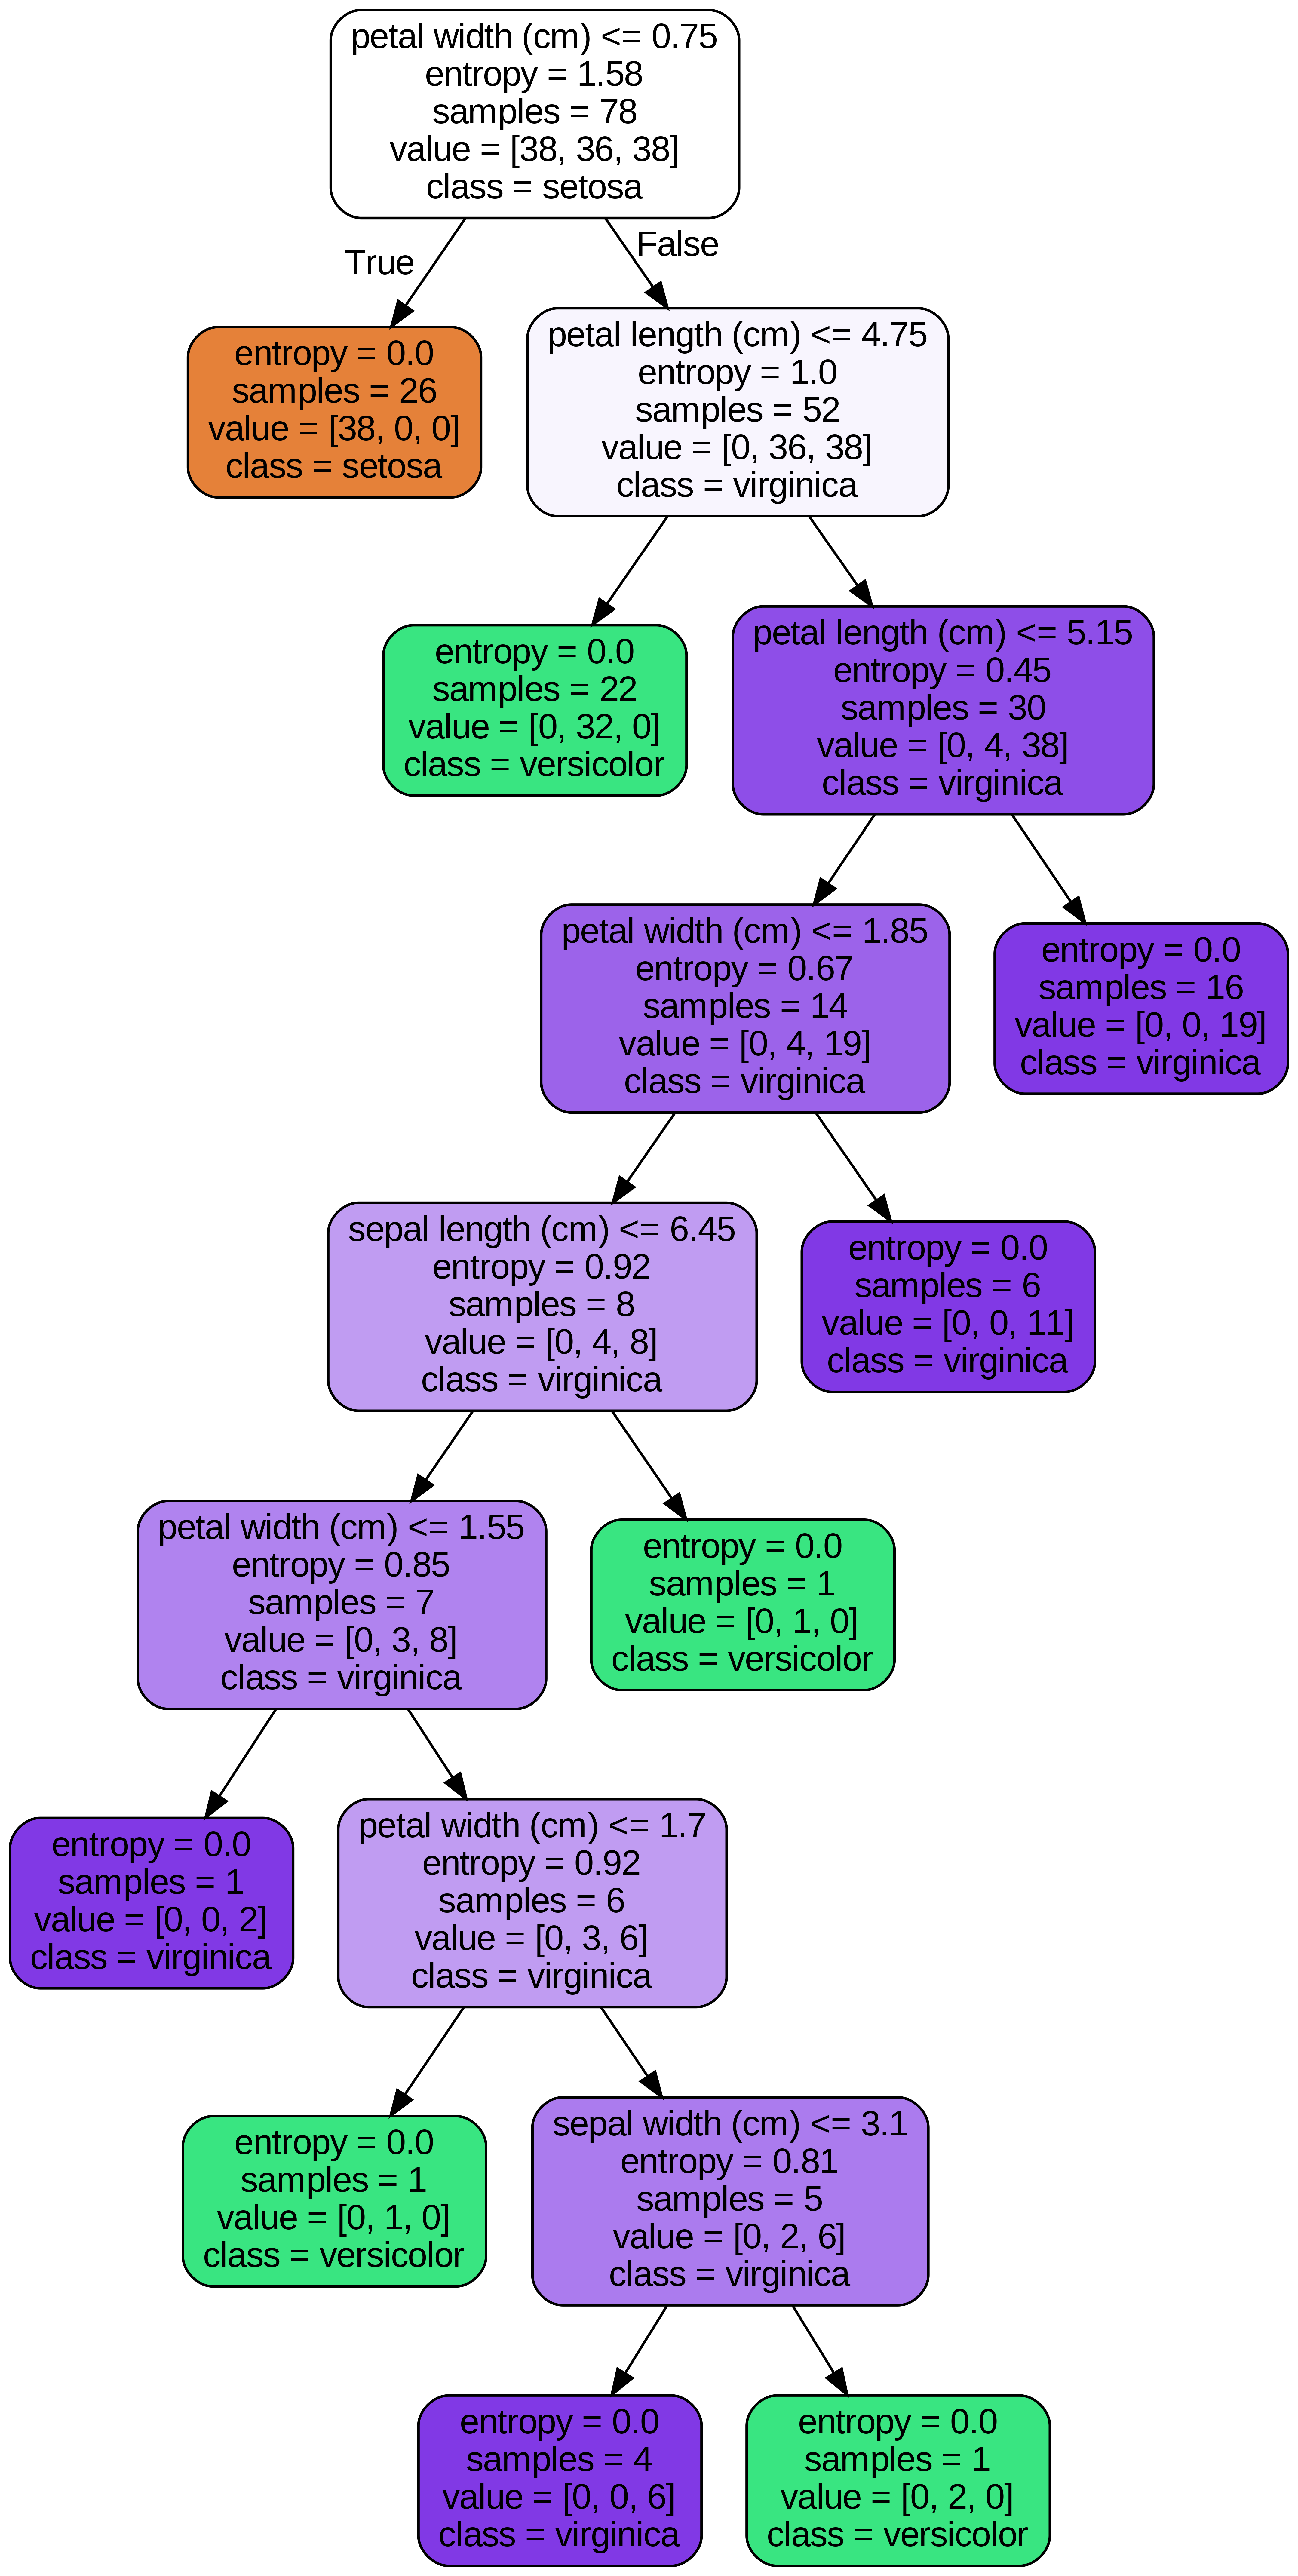

In [38]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

## Using impurity to understand physical importance

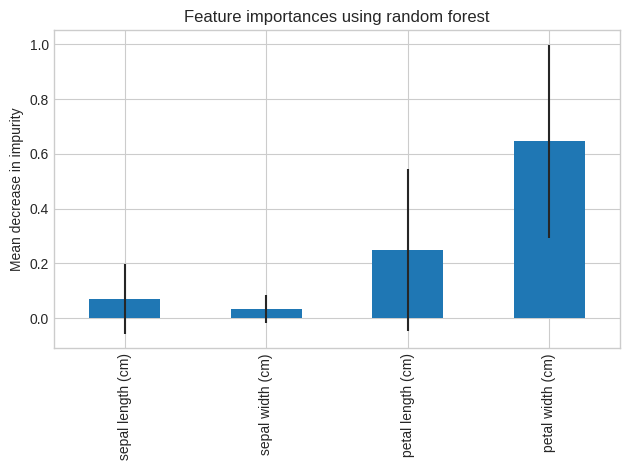

In [39]:
# use feature importance to understand

importances = rfclassifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclassifier.estimators_], axis=0)

forest_importances = pd.Series(importances, index=data.feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using random forest")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## In-class exercise: Regression example with random forest model
As an excercise for decision tree, We will use the ENSO prediction from last week to practice the model prediction and validation.

### Software Requirements

Similar to the example last week, we first import the following libraries: numpy, xarray, netCDF4, pandas, matplotlib, sklearn, tqdm, scipy.

In [18]:
%matplotlib inline
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import sklearn.ensemble
import scipy.stats
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import xarray as xr
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import sklearn.ensemble
import scipy.stats
from sklearn.model_selection import train_test_split 
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

## Data



*   [Cobe Sea-Surface Temperature Dataset:](https://psl.noaa.gov/data/gridded/data.cobe.html): this is a dataset of historical sea surface temperatures form 1880 to 2018
*   [Nino3.4 Indices](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/): The Nino3.4 index measures the 3-month rolling average of equatorial Pacific Ocean temperature anomalies.




### Input Variables

Sea surface temperature (K)

### Output Variables

Nino3.4 index (K): this metric indicates the state of ENSO.



### Training Set

Baseline training set: Training on **1980-1995 sea Surface temperatures** and their corresponding Nino3.4 Index at lead times (1 month to 5 months)

### Val Set
**1997-2006 sea surface temperatures** and their corresponding Nino3.4 Index at lead times.

### Test Set: 

Test on **2007-2017 sea surface temperatures** and their corresponding Nino3.4 Index at lead times (1 month to 5 month).


Follow the previous class, please write a function to read in netcdf files and calculate.

In [19]:
# download ENSO index file from Yi-Chi's google drive.
#https://drive.google.com/file/d/1bQLw7S3OwuvTKHOjnrYEanWSAHlu8sP1/view?usp=share_link
!gdown 1bQLw7S3OwuvTKHOjnrYEanWSAHlu8sP1

Downloading...
From: https://drive.google.com/uc?id=1bQLw7S3OwuvTKHOjnrYEanWSAHlu8sP1
To: /content/ENSOindex.oni.1960-2020.nc
100% 23.0k/23.0k [00:00<00:00, 24.4MB/s]


In [20]:
#Download sst observations from 1880 to 2018
!gdown 1-xefk3imP4Q-8GevIV2YIo82iP5rTdSc

Downloading...
From: https://drive.google.com/uc?id=1-xefk3imP4Q-8GevIV2YIo82iP5rTdSc
To: /content/sst.mon.mean.trefadj.anom.1880to2018.nc
100% 432M/432M [00:05<00:00, 84.6MB/s]


In [21]:
# check if ENSO index file is loaded
filename ='ENSOindex.oni.1960-2020.nc'
ds_sst = xr.open_dataset(filename)
ds_sst.head()

<xarray.Dataset>
Dimensions:  (time: 5)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 1960-05-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

## Predicting ENSO with random forest model

Now let's try training a random forest model to forecast ENSO.  In this section, we will use scikitlearn as our machine learning framework.
In this section, the `assemble_predictors_predictands` method has been extended to load in data from observations AND from GCMs. But we will only use observations here.

In [22]:
#Scaffold code to load in data.  This code cell is mostly data wrangling


def load_enso_indices():
  """
  Reads in the netcdf file to output a pandas Series of ENSO vals

  outputs
  -------

    pd.Series : monthly ENSO values starting from 1870-01-01
  """
  #read SST
  filename ='ENSOindex.oni.1960-2020.nc'
  ds_sst = xr.open_dataset(filename)
  ds_sst
  ds_sst = ds_sst.sel(time=slice('1979', '2019'))
  ds_sst.load()
  ts_nino34 = ds_sst["sst"].to_series()
  return ts_nino34

def assemble_predictors_predictands(start_date, end_date, lead_time, 
                                    dataset, data_format,
                                    num_input_time_steps=1,
                                    use_pca=False, n_components=32,
                                    lat_slice=None, lon_slice=None):
  """
  inputs
  ------

      start_date           str : the start date from which to extract sst
      end_date             str : the end date 
      lead_time            str : the number of months between each sst
                              value and the target Nino3.4 Index
      dataset              str : 'observations' 'CNRM' or 'MPI'
      data_format          str : 'spatial' or 'flatten'. 'spatial' preserves
                                  the lat/lon dimensions and returns an 
                                  array of shape (num_samples, num_input_time_steps,
                                  lat, lon).  'flatten' returns an array of shape
                                  (num_samples, num_input_time_steps*lat*lon)
      num_input_time_steps int : the number of time steps to use for each 
                                 predictor sample
      use_pca             bool : whether or not to apply principal components
                              analysis to the sst field
      n_components         int : the number of components to use for PCA
      lat_slice           slice: the slice of latitudes to use 
      lon_slice           slice: the slice of longitudes to use

  outputs
  -------
      Returns a tuple of the predictors (np array of sst temperature anomalies) 
      and the predictands (np array the ENSO index at the specified lead time).

  """
  file_name = {'observations' : 'sst.mon.mean.trefadj.anom.1880to2018.nc',
               'CNRM'         : 'CNRM_tas_anomalies_regridded.nc',
               'MPI'          : 'MPI_tas_anomalies_regridded.nc'}[dataset]
  variable_name = {'observations' : 'sst',
                   'CNRM'         : 'tas',
                   'MPI'          : 'tas'}[dataset]
  ds = xr.open_dataset(file_name)
  sst = ds[variable_name].sel(time=slice(start_date, end_date))
  if lat_slice is not None:
    """YOUR CODE HERE"""
    raise NotImplementedError("If you desire, you must implement the slicing!")
  if lon_slice is not None:
    """YOUR CODE HERE"""
    raise NotImplementedError("If you desire, you must implement the slicing!")
  
  
  num_samples = sst.shape[0]
  #sst is a (num_samples, lat, lon) array
  #the line below converts it to (num_samples, num_input_time_steps, lat, lon)
  sst = np.stack([sst.values[n-num_input_time_steps:n] for n in range(num_input_time_steps,
                                                              num_samples+1)])
  #CHALLENGE: CAN YOU IMPLEMENT THE ABOVE LINE WITHOUT A FOR LOOP?
  num_samples = sst.shape[0]

  sst[np.isnan(sst)] = 0
  if data_format=='flatten':
    #sst is a 3D array: (time_steps, lat, lon)
    #in this tutorial, we will not be using ML models that take
    #advantage of the spatial nature of global temperature
    #therefore, we reshape sst into a 2D array: (time_steps, lat*lon)
    #(At each time step, there are lat*lon predictors)
    sst = sst.reshape(num_samples, -1)
    

    #Use Principal Components Analysis, also called
    #Empirical Orthogonal Functions, to reduce the
    #dimensionality of the array
    if use_pca:
      pca = sklearn.decomposition.PCA(n_components=n_components)
      pca.fit(sst)
      X = pca.transform(sst)
    else:
      X = sst
  else: # data_format=='spatial'
    X = sst

  start_date_plus_lead = pd.to_datetime(start_date) + \
                        pd.DateOffset(months=lead_time+num_input_time_steps-1)
  end_date_plus_lead = pd.to_datetime(end_date) + \
                      pd.DateOffset(months=lead_time)
  if dataset == 'observations':
    y = load_enso_indices()[slice(start_date_plus_lead, 
                                  end_date_plus_lead)]
  else: #the data is from a GCM
    X = X.astype(np.float32)
    #The Nino3.4 Index is composed of three month rolling values
    #Therefore, when calculating the Nino3.4 Index in a GCM
    #we have to extract the two months prior to the first target start date
    target_start_date_with_2_month = start_date_plus_lead - pd.DateOffset(months=2)
    subsetted_ds = ds[variable_name].sel(time=slice(target_start_date_with_2_month,
                                                   end_date_plus_lead))
    #Calculate the Nino3.4 index
    y = subsetted_ds.sel(lat=slice(5,-5), lon=slice(360-170,360-120)).mean(dim=('lat','lon'))

    y = pd.Series(y.values).rolling(window=3).mean()[2:].values
    y = y.astype(np.float32)
  ds.close()
  return X.astype(np.float32), y.astype(np.float32)

**IMPORTANT info about `num_input_time_steps`:** `num_input_time_steps` refers to the number of time steps for each predictor.  For example, if `num_input_time_steps` is set to 3, then the machine learning model will take 3 months as its input.  In other words, a sample predictor will be 3 months of average temperature: Jan average temperature, Feb average temperature, and March average temperature (i.e. an array of (3, lat, lon)).  The predictand will be the Niño3.4 index `lead_time` months after March.


Note: these traditional ML algorithms do not take advantage of the spatial nature of gridded datasets.  Therefore, they require the `data_format` argument to be set to 'flatten': the predictors are in the shape `(num_samples,lat*lon*num_time_steps)`.

In [23]:
def plot_nino_time_series(y, predictions, title):
  """
  inputs
  ------
    y           pd.Series : time series of the true Nino index
    predictions np.array  : time series of the predicted Nino index (same
                            length and time as y)
    titile                : the title of the plot

  outputs
  -------
    None.  Displays the plot
  """
  predictions = pd.Series(predictions, index=y.index)
  predictions = predictions.sort_index()
  y = y.sort_index()

  plt.plot(y, label='Ground Truth')
  plt.plot(predictions, '--', label='ML Predictions')
  plt.legend(loc='best')
  plt.title(title)
  plt.ylabel('Nino3.4 Index')
  plt.xlabel('Date')
  plt.show()
  plt.close()

In [24]:
"""Plot the performance of linear regression at 1 month ahead lead time"""
#1 month linear regression (lr) model
train_start_date = '1990-01-01'
train_end_date = '2005-12-31'
num_input_time_steps = 2
lead_time = 2 #change this and explore what happens!
train_predictors, train_predictands = assemble_predictors_predictands(train_start_date,
                      train_end_date, lead_time, 'observations', 'flatten', 
                      num_input_time_steps=num_input_time_steps)
test_predictors, test_predictands = assemble_predictors_predictands('2007-01-01',
                    '2017-12-31', lead_time, 'observations', 'flatten', 
                    num_input_time_steps=num_input_time_steps)



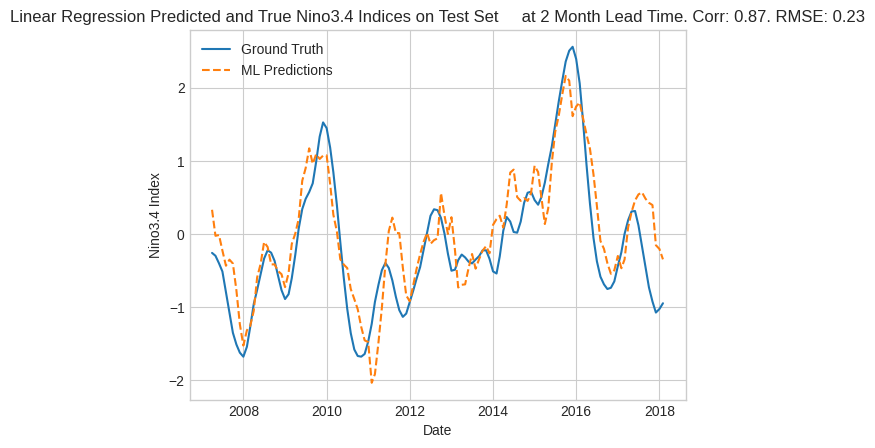

In [25]:
regr_1_month_lr = sklearn.linear_model.LinearRegression()
regr_1_month_lr.fit(train_predictors,train_predictands)

sklearn_predictions = regr_1_month_lr.predict(test_predictors)
corr, _ = scipy.stats.pearsonr(sklearn_predictions, test_predictands)
rmse = mean_squared_error(sklearn_predictions, test_predictands)
plot_nino_time_series(test_predictands, sklearn_predictions,
    'Linear Regression Predicted and True Nino3.4 Indices on Test Set \
    at {} Month Lead Time. Corr: {:.2f}. RMSE: {:.2f}'.format(lead_time, corr, rmse))

Write a model with random forest to predict ENSO, calculate correlation, and plot prediction and observations.

**EXERCISE questions:** 
1. Please compare the performance of random forest model and the linear regression model we developed last week. State the data period for training and testing, and performance metrics you use for evaluation.
2. Try changing the lead_time in the `assemble_predictors_predictands` method (it is set to 1 initially).  How do the random forest models perform?

In [26]:
#%%timeit
#Answer for using random forest to predict ENSO
#from sklearn.ensemble import RandomForestRegressor 

 

## Take-home exercise: Classification problem of ENSO prediction
Now we would like to turn the regression problem of ENSO prediction into a classification problem of El Nino and La Nina. 
Here, we define the El Nino event as the Nino3.4 index larger than 0.5 for consecutive 5 months, the La Nina event as the Nino3.4 smaller than -0.5 for consecutive 5 months, and neutral states.

Please develop a random forest model to predict El Nino/La Nina/neutral events with global SST dataset above.
Use the confusion matrix to evaluate your model performance.

In [41]:
# Here is the code segment to transform ENSO time series into the three label classes.
# neutral states as 0, La Nina as 1, El Nino as 2
_, y = assemble_predictors_predictands('1990-01-01','2005-12-31',1,'observations', 'flatten', 
                      num_input_time_steps=num_input_time_steps)
y_el_nino_binary = (y > 0.5).rolling(window=5).min()
y_la_nina_binary = (y < 0.5).rolling(window=5).min()
y_classification = pd.Series(np.zeros(y_el_nino_binary.shape),
                     index=y.index)
y_classification[y_el_nino_binary == 1.0] = 2 
y_classification[y_la_nina_binary == 1.0] = 1  

In [ ]:
# plot time series of y_classfication and Nino3.4 to make sure ENSO classification.

In [ ]:
# split the SST and labels data into training and testing


# define random forecast model

# train model

# make predictions


In [ ]:
# evaluate confusion matrix of model performance


### Machine Learning Fundamentals

*  Chapters from Professor Jonathan Shewchuk's excellent lecture notes from CS189 (UC Berkeley's Machine Learning class)
**   Professor Shewchuk's lecture notes can be found at this [link ](https://people.eecs.berkeley.edu/~jrs/papers/machlearn.pdf)

* Course notes developed by TAs including Garrett Thomas and Soroush Nasiriany
, which provides a rigorous mathematical basis of the foundations of machine learning. If you are interested in going deeper into machine learning, I strongly recommend reading these two resources.
**   Nasiriany and Thomas's course notes can be found at this [link ](http://snasiriany.me/files/ml-book.pdf)